## Analysing textual features

In [1]:
import keras
import re
import numpy as np
import pandas as pd

import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    
%matplotlib inline

Using TensorFlow backend.


In [2]:
from methods.baseline import Baseline
from methods.experiments import Experiment
from methods.evaluation import Evaluation
from methods.retrieval import Retrieval

In [3]:
MAX_SEQUENCE_LENGTH_T = 100 # 40
MAX_SEQUENCE_LENGTH_D = 100 # 200
EMBEDDING_DIM = 300
MAX_NB_WORDS = 2000

In [4]:
DOMAIN = 'eclipse'
DIR = 'data/processed/{}'.format(DOMAIN)
DIR_PAIRS = 'data/normalized/{}'.format(DOMAIN)
DATASET = os.path.join('data/normalized/{}'.format(DOMAIN), '{}.csv'.format(DOMAIN))

In [5]:
df_train_pair = pd.read_csv(os.path.join(DIR_PAIRS, '{}_pairs.csv'.format(DOMAIN)))
baseline = Baseline(DIR, DATASET, MAX_SEQUENCE_LENGTH_T, MAX_SEQUENCE_LENGTH_D)
evaluation = Evaluation(verbose=0)
retrieval = Retrieval()
experiment = Experiment(baseline, evaluation)

In [6]:
experiment.set_retrieval(retrieval, baseline, DOMAIN)

Creating the buckets...


In [7]:
experiment.load_ids()

Reading bug ids


In [8]:
len(baseline.bug_ids)

361006

In [9]:
experiment.load_bugs()

In [10]:
issues_by_buckets = experiment.get_buckets_for_bugs()

In [11]:
%%time

baseline.prepare_dataset(issues_by_buckets)

Reading train data
Reading bug ids
CPU times: user 3min 17s, sys: 16.9 ms, total: 3min 17s
Wall time: 3min 17s


In [12]:
title_corpus = [baseline.bug_set[i]['title'][:100] for i in tqdm(baseline.bug_ids)]
description_corpus = [baseline.bug_set[i]['description'][:100] for i in tqdm(baseline.bug_ids)]

100%|██████████| 361006/361006 [00:00<00:00, 1586868.10it/s]


In [13]:
title_length = [len(baseline.bug_set[i]['title'].split(' ')) for i in tqdm(baseline.bug_ids)]
description_length = [len(baseline.bug_set[i]['description'].split(' ')) for i in tqdm(baseline.bug_ids)]

100%|██████████| 361006/361006 [00:02<00:00, 150840.30it/s]


          short_desc
count  361006.000000
mean        8.635048
std         3.533361
min         1.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        47.000000
         description
count  361006.000000
mean      150.225381
std       371.904844
min         1.000000
25%        35.000000
50%        66.000000
75%       128.000000
max     15501.000000


Text(0.5, 0, 'número de tokens')

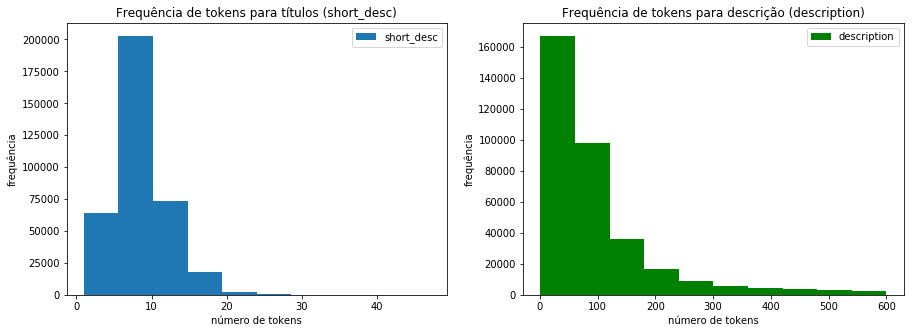

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
# Title
df_title = pd.DataFrame(title_length, columns=['short_desc'])
print(df_title.describe())
ax = df_title.plot.hist(ax=axes[0])
ax.set_title('Frequência de tokens para títulos (short_desc)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')
# Description
df_desc = pd.DataFrame(description_length, columns=['description'])
print(df_desc.describe())
df_desc = df_desc[df_desc['description'] <= 600]
ax = df_desc.plot.hist(color='g', ax=axes[1])
ax.set_title('Frequência de tokens para descrição (description)')
ax.set_ylabel('frequência')
ax.set_xlabel('número de tokens')

### Word cloud title

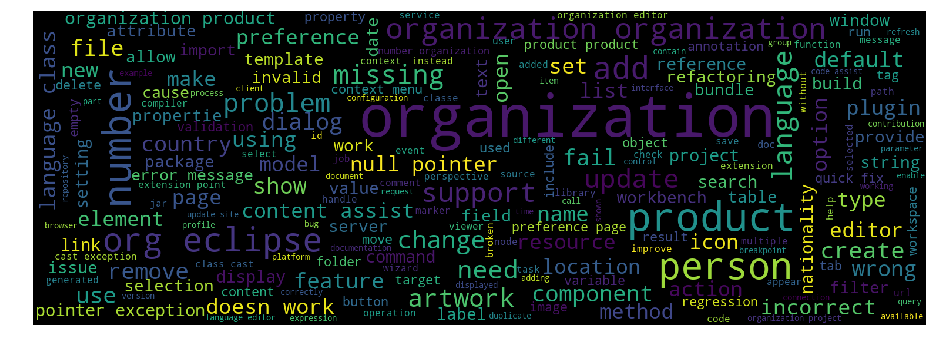

CPU times: user 10.3 s, sys: 316 ms, total: 10.6 s
Wall time: 10.5 s


In [15]:
%%time

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(title_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Word cloud description

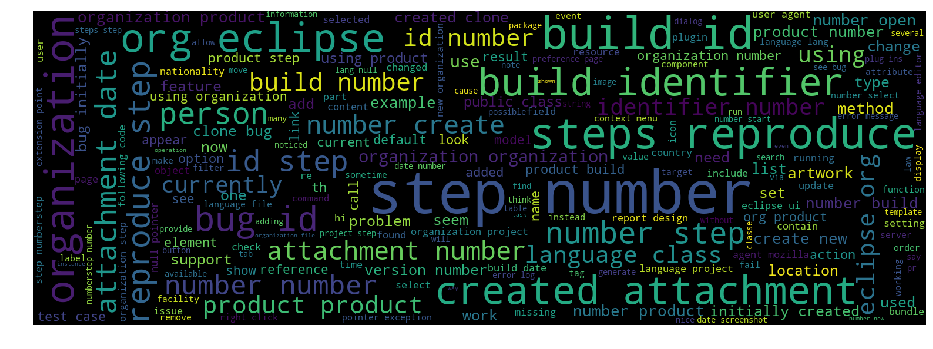

CPU times: user 14.9 s, sys: 444 ms, total: 15.4 s
Wall time: 15.2 s


In [16]:
%%time

wordcloud = WordCloud(max_font_size=100,width = 1520, height = 535).generate(" ".join(description_corpus))
plt.figure(figsize=(16,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#### Total missing values after preprocessing

In [17]:
bugs_empty_desc = [idx for idx in list(baseline.bug_set) if baseline.bug_set[idx]['description'] == '']
bugs_empty_title = [idx for idx in list(baseline.bug_set) if baseline.bug_set[idx]['title'] == '']

In [18]:
len(bugs_empty_title), len(bugs_empty_desc)

(29, 4975)

In [19]:
df = pd.read_csv(DATASET)
df[df['bug_id'].isin(bugs_empty_desc)]

,bug_id,bug_severity,bug_status,component,creation_ts,delta_ts,description,dup_id,priority,product,resolution,short_desc,version
3208,4366,normal,RESOLVED,UI,2001-10-11 08:36:00 -0400,2002-02-12 10:51:00 -0500,,[],P3,JDT,FIXED,Function to reactivate argument hover would be...,2.0
3796,4976,enhancement,CLOSED,Compare,2001-10-15 09:20:00 -0400,2009-08-30 02:21:33 -0400,,[],P3,Platform,WONTFIX,Replace from local history should use a table ...,2.0
3885,5074,normal,RESOLVED,UI,2001-10-18 10:10:00 -0400,2001-10-22 12:35:09 -0400,,[],P3,JDT,WORKSFORME,Problems with editor linking,2.0
4006,5200,normal,RESOLVED,Core,2001-10-24 07:57:00 -0400,2002-01-11 09:08:56 -0500,,[],P3,JDT,FIXED,SetClasspathOperation must close root only whe...,2.0
4533,5739,enhancement,RESOLVED,Build,2001-11-09 16:04:00 -0500,2003-05-13 15:21:53 -0400,,35144,P3,PDE,DUPLICATE,[build] PDE templates don't generate JavaDoc,1.0
4856,6063,normal,VERIFIED,Debug,2001-11-19 09:34:00 -0500,2002-01-21 18:44:31 -0500,,[],P2,JDT,FIXED,Snippet & Display should catch up with changes...,2.0
4869,6076,normal,RESOLVED,UI,2001-11-19 14:03:00 -0500,2002-05-13 11:32:06 -0400,,[],P3,Platform,FIXED,"Problems from first ""no mouse day""",2.0
4881,6088,normal,VERIFIED,Debug,2001-11-19 19:15:00 -0500,2002-01-14 17:13:20 -0500,,[],P2,Platform,FIXED,"Move ""qualified name"" rendering to java debug",2.0
4882,6089,normal,VERIFIED,Debug,2001-11-19 19:47:00 -0500,2002-03-20 19:42:17 -0500,,[],P1,JDT,FIXED,display view code assist cotext should be rece...,2.0
4885,6092,normal,VERIFIED,UI,2001-11-20 06:00:00 -0500,2002-01-15 09:38:07 -0500,,[],P3,JDT,FIXED,JavaEditor should honor the tab width setting ...,2.0


In [20]:
len(bugs_empty_desc) / len(baseline.bug_set) * 100.0

1.3780934388902124